In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 8

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
Total params: 1,158
Trainable params: 1,158
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/7 [===>..........................] - ETA: 2s - loss: 2.1793 - accuracy: 0.0547
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 1s 31ms/step - loss: 2.1658 - accuracy: 0.0761 - val_loss: 2.0610 - val_accuracy: 0.0684
Epoch 2/1000
1/7 [===>..........................] - ETA: 0s - loss: 2.0737 - accuracy: 0.1562
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 2.0914 - accuracy: 0.1206 - val_loss: 1.9898 - val_accuracy: 0.1749
Epoch 3/1000
1/7 [===>..........................] - ETA: 0s - loss: 2.0189 - accuracy: 0.1406
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 2.0106 - accuracy: 0.1675 - val_loss: 1.9315 - val_accuracy: 0.2700
Epoch 4/1000
1/7 [===>..........................] - ETA: 0s - loss: 1.9399 - accuracy: 0.2266
Epoch 4: savin

7/7 [==============================] - 0s 9ms/step - loss: 1.1630 - accuracy: 0.5673 - val_loss: 0.9956 - val_accuracy: 0.7833
Epoch 29/1000
1/7 [===>..........................] - ETA: 0s - loss: 1.1931 - accuracy: 0.5703
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 1.1343 - accuracy: 0.6028 - val_loss: 0.9636 - val_accuracy: 0.7795
Epoch 30/1000
1/7 [===>..........................] - ETA: 0s - loss: 1.1658 - accuracy: 0.5391
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 1.1374 - accuracy: 0.5761 - val_loss: 0.9299 - val_accuracy: 0.7757
Epoch 31/1000
1/7 [===>..........................] - ETA: 0s - loss: 1.1905 - accuracy: 0.5156
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 1.1175 - accuracy: 0.5901 - val_loss: 0.8978

Epoch 56/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.7990 - accuracy: 0.6875
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.7656 - accuracy: 0.6967 - val_loss: 0.5060 - val_accuracy: 0.8973
Epoch 57/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.7016 - accuracy: 0.7422
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.7567 - accuracy: 0.7069 - val_loss: 0.4947 - val_accuracy: 0.8973
Epoch 58/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.6696 - accuracy: 0.7422
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.7456 - accuracy: 0.7030 - val_loss: 0.4847 - val_accuracy: 0.9125
Epoch 59/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.7436 - accuracy: 0.6875
Epoch 59

7/7 [==============================] - 0s 9ms/step - loss: 0.6486 - accuracy: 0.7322 - val_loss: 0.3643 - val_accuracy: 0.9240
Epoch 84/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.7200 - accuracy: 0.7031
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.6621 - accuracy: 0.7437 - val_loss: 0.3621 - val_accuracy: 0.9278
Epoch 85/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.5333 - accuracy: 0.7891
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.6039 - accuracy: 0.7741 - val_loss: 0.3569 - val_accuracy: 0.9240
Epoch 86/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.6356 - accuracy: 0.7344
Epoch 86: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.6291 - accuracy: 0.7424 - val_loss: 0.3524

Epoch 111/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.6108 - accuracy: 0.7812
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.5747 - accuracy: 0.7779 - val_loss: 0.2946 - val_accuracy: 0.9392
Epoch 112/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.5476 - accuracy: 0.7812
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.5698 - accuracy: 0.7741 - val_loss: 0.2945 - val_accuracy: 0.9392
Epoch 113/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.5729 - accuracy: 0.7969
Epoch 113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.5608 - accuracy: 0.7906 - val_loss: 0.2930 - val_accuracy: 0.9430
Epoch 114/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.5891 - accuracy: 0.7578
E

1/7 [===>..........................] - ETA: 0s - loss: 0.5139 - accuracy: 0.8047
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.5256 - accuracy: 0.8109 - val_loss: 0.2419 - val_accuracy: 0.9582
Epoch 139/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.5380 - accuracy: 0.7969
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.5360 - accuracy: 0.7868 - val_loss: 0.2380 - val_accuracy: 0.9544
Epoch 140/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.4347 - accuracy: 0.8516
Epoch 140: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.4613 - accuracy: 0.8414 - val_loss: 0.2355 - val_accuracy: 0.9506
Epoch 141/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.5317 - accuracy: 0.7891
Epoch 141: savin

1/7 [===>..........................] - ETA: 0s - loss: 0.5110 - accuracy: 0.8203
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.4666 - accuracy: 0.8388 - val_loss: 0.2097 - val_accuracy: 0.9544
Epoch 166/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.4718 - accuracy: 0.8047
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.4898 - accuracy: 0.8109 - val_loss: 0.2079 - val_accuracy: 0.9544
Epoch 167/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.5510 - accuracy: 0.7500
Epoch 167: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.4745 - accuracy: 0.8122 - val_loss: 0.2057 - val_accuracy: 0.9544
Epoch 168/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.3980 - accuracy: 0.8281
Epoch 168: savin

1/7 [===>..........................] - ETA: 0s - loss: 0.4948 - accuracy: 0.8203
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.4592 - accuracy: 0.8274 - val_loss: 0.1789 - val_accuracy: 0.9544
Epoch 193/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.5549 - accuracy: 0.7891
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.4896 - accuracy: 0.8173 - val_loss: 0.1780 - val_accuracy: 0.9582
Epoch 194/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.3401 - accuracy: 0.8750
Epoch 194: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.4607 - accuracy: 0.8249 - val_loss: 0.1770 - val_accuracy: 0.9544
Epoch 195/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.4631 - accuracy: 0.8203
Epoch 195: savin

1/7 [===>..........................] - ETA: 0s - loss: 0.4453 - accuracy: 0.7969
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.4200 - accuracy: 0.8312 - val_loss: 0.1621 - val_accuracy: 0.9620
Epoch 220/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.4712 - accuracy: 0.8516
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.4690 - accuracy: 0.8160 - val_loss: 0.1594 - val_accuracy: 0.9696
Epoch 221/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.3473 - accuracy: 0.8906
Epoch 221: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.3927 - accuracy: 0.8604 - val_loss: 0.1570 - val_accuracy: 0.9696
Epoch 222/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.4963 - accuracy: 0.7812
Epoch 222: savin

1/7 [===>..........................] - ETA: 0s - loss: 0.4142 - accuracy: 0.8672
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.4106 - accuracy: 0.8655 - val_loss: 0.1493 - val_accuracy: 0.9658
Epoch 247/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.4213 - accuracy: 0.8281
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.4172 - accuracy: 0.8426 - val_loss: 0.1465 - val_accuracy: 0.9658
Epoch 248/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.3516 - accuracy: 0.8750
Epoch 248: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.4223 - accuracy: 0.8363 - val_loss: 0.1438 - val_accuracy: 0.9658
Epoch 249/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.3989 - accuracy: 0.8906
Epoch 249: savin

1/7 [===>..........................] - ETA: 0s - loss: 0.4065 - accuracy: 0.8438
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.4166 - accuracy: 0.8350 - val_loss: 0.1468 - val_accuracy: 0.9658
Epoch 274/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.3371 - accuracy: 0.8516
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.3770 - accuracy: 0.8591 - val_loss: 0.1464 - val_accuracy: 0.9772
Epoch 275/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.4629 - accuracy: 0.8125
Epoch 275: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.4224 - accuracy: 0.8426 - val_loss: 0.1462 - val_accuracy: 0.9810
Epoch 276/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.4271 - accuracy: 0.8281
Epoch 276: savin

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 2ms/step - loss: 0.1422 - accuracy: 0.9810


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[2.1806632e-03 1.4315929e-05 3.6097623e-05 9.6697015e-01 8.1539946e-07
 2.9534506e-02 1.2625067e-03 1.0358109e-06]
3


# 混同行列

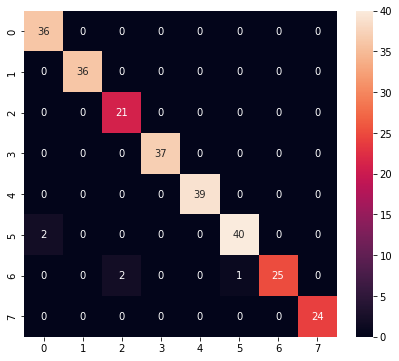

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       1.00      1.00      1.00        36
           2       0.91      1.00      0.95        21
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        39
           5       0.98      0.95      0.96        42
           6       1.00      0.89      0.94        28
           7       1.00      1.00      1.00        24

    accuracy                           0.98       263
   macro avg       0.98      0.98      0.98       263
weighted avg       0.98      0.98      0.98       263



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Gabriel\AppData\Local\Temp\tmpfbt7im_l\assets


6592

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.1806636e-03 1.4315928e-05 3.6097586e-05 9.6697015e-01 8.1540014e-07
 2.9534521e-02 1.2625073e-03 1.0358107e-06]
3
